# `plotting`
> Utility Functions that can be used to manage colors and other plotting tools. Includes all stable utility functions.

In [ ]:
#| default_exp plotting

In [ ]:
#| hide
from nbdev import show_doc, nbdev_export

In [ ]:
#| export
from __future__ import annotations
from collections import OrderedDict
from itertools import combinations
from typing import Optional


import numpy as np
import matplotlib
import matplotlib.colors as colors
import matplotlib.cm as cm
import matplotlib.pyplot as plt

# Work with color maps

In [ ]:
#| export
cmaps = OrderedDict()

cmaps['Perceptually Uniform Sequential'] = [
            'viridis', 'plasma', 'inferno', 'magma', 'cividis']
cmaps['Sequential'] = [
            'Greys', 'Purples', 'Blues', 'Greens', 'Oranges', 'Reds',
            'YlOrBr', 'YlOrRd', 'OrRd', 'PuRd', 'RdPu', 'BuPu',
            'GnBu', 'PuBu', 'YlGnBu', 'PuBuGn', 'BuGn', 'YlGn']
cmaps['Diverging'] = [
            'PiYG', 'PRGn', 'BrBG', 'PuOr', 'RdGy', 'RdBu',
            'RdYlBu', 'RdYlGn', 'Spectral', 'coolwarm', 'bwr', 'seismic']
cmaps['Sequential (2)'] = [
            'binary', 'gist_yarg', 'gist_gray', 'gray', 'bone', 'pink',
            'spring', 'summer', 'autumn', 'winter', 'cool', 'Wistia',
            'hot', 'afmhot', 'gist_heat', 'copper']
cmaps['Cyclic'] = ['twilight', 'twilight_shifted', 'hsv']
cmaps['Qualitative'] = ['Pastel1', 'Pastel2', 'Paired', 'Accent',
                        'Dark2', 'Set1', 'Set2', 'Set3',
                        'tab10', 'tab20', 'tab20b', 'tab20c']
cmaps['Miscellaneous'] = [
            'flag', 'prism', 'ocean', 'gist_earth', 'terrain', 'gist_stern',
            'gnuplot', 'gnuplot2', 'CMRmap', 'cubehelix', 'brg',
            'gist_rainbow', 'rainbow', 'jet', 'nipy_spectral', 'gist_ncar']

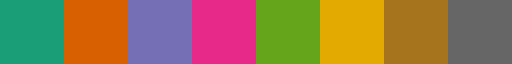

In [ ]:
matplotlib.colormaps['Dark2']

In [ ]:
#| export
def plot_cmap_collections(
    cmap_collections:str|list[str]=None  # list of color map collections to display (from cmaps.keys())
):
    """Plot all color maps in the collections passed as `cmap_collections`"""
    if cmap_collections is None: cmap_collections = cmaps.keys()
    cmap_lists = [cmap_list for cmap_cat, cmap_list in cmaps.items() if cmap_cat in cmap_collections]
    gradient = np.linspace(0, 1, 256)
    gradient = np.vstack((gradient, gradient))

    def plot_color_gradients(cmap_category, cmap_list, nrows):
        fig, axes = plt.subplots(nrows=nrows, ncols=1, figsize=(8, nrows * 0.3))
        fig.subplots_adjust(top=0.75, bottom=0.01, left=0.2, right=0.99)
        axes[0].set_title(cmap_category + ' colormaps', fontsize=14)

        for ax, name in zip(axes, cmap_list):
            ax.imshow(gradient, aspect='auto', cmap=plt.matplotlib.colormaps[name])
            pos = list(ax.get_position().bounds)
            x_text = pos[0] - 0.01
            y_text = pos[1] + pos[3]/2.
            fig.text(x_text, y_text, name, va='center', ha='right', fontsize=10)

        # Turn off *all* ticks & spines, not just the ones with colormaps.
        for ax in axes:
            ax.set_axis_off()

    for cmap_category, cmap_list in zip(cmap_collections, cmap_lists):
        n_color_bars = len(cmap_list)
        plot_color_gradients(cmap_category, cmap_list, n_color_bars)

    plt.show()

In [ ]:
show_doc(plot_cmap_collections)

---

### plot_cmap_collections

>      plot_cmap_collections (cmap_collections:str|list[str]=None)

Plot all color maps in the collections passed as `cmap_collections`

|    | **Type** | **Default** | **Details** |
| -- | -------- | ----------- | ----------- |
| cmap_collections | str \| list[str] | None | list of color map collections to display (from cmaps.keys()) |

The following color map collections are defined:

In [ ]:
#|echo: false
for k in sorted(list(cmaps.keys())):
    print('-',k)

- Cyclic
- Diverging
- Miscellaneous
- Perceptually Uniform Sequential
- Qualitative
- Sequential
- Sequential (2)


`plot_cmap_collections` will plot a color bar for each color map in the selected collections:

- A single collection

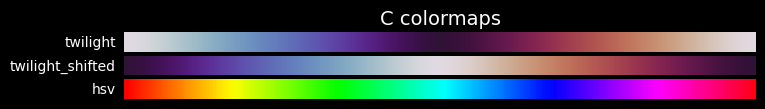

In [ ]:
plot_cmap_collections('Cyclic')

- Several collections

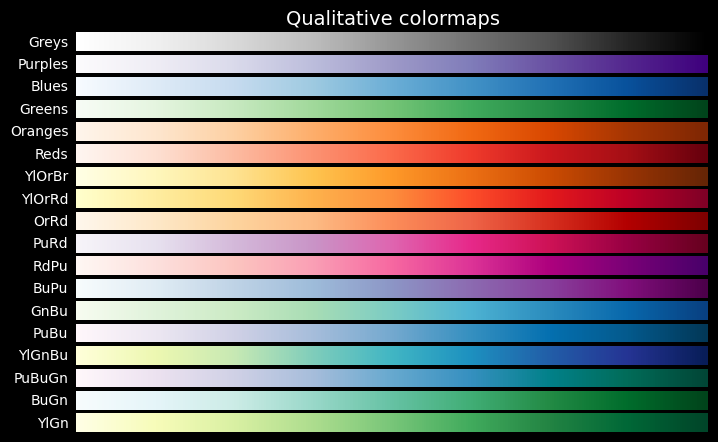

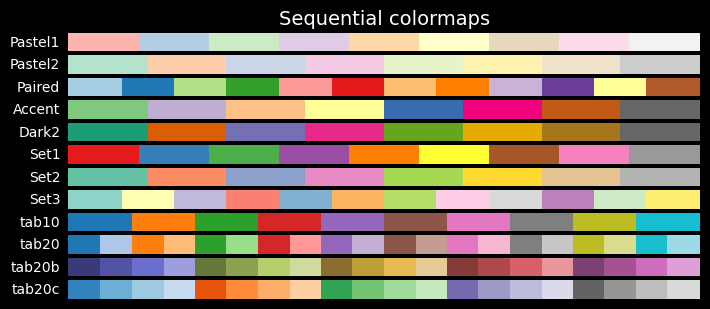

In [ ]:
plot_cmap_collections(['Qualitative', 'Sequential'])

- All the collections

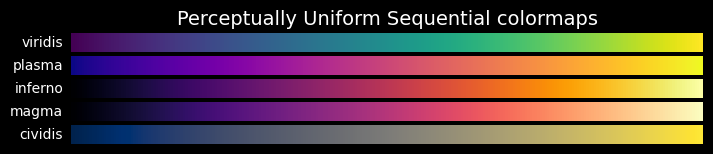

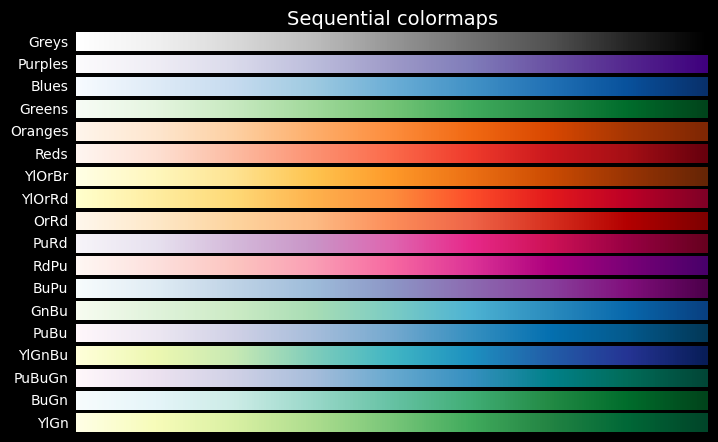

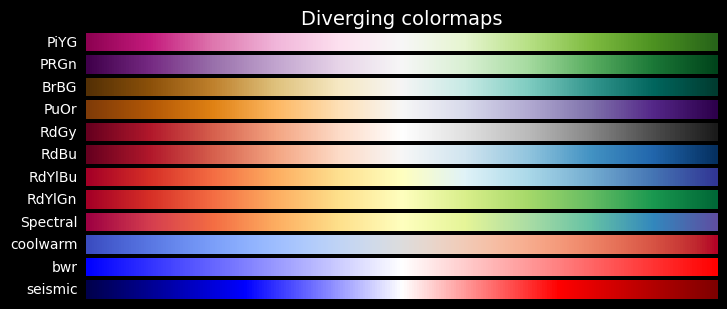

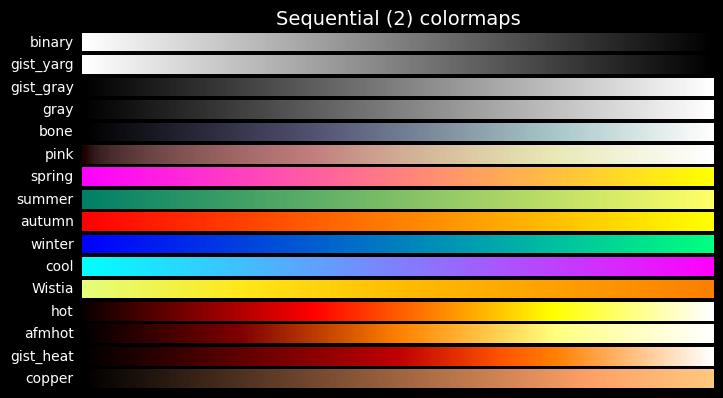

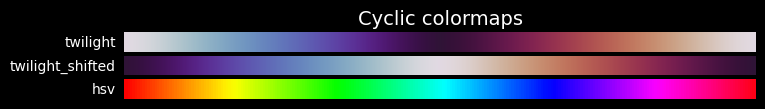

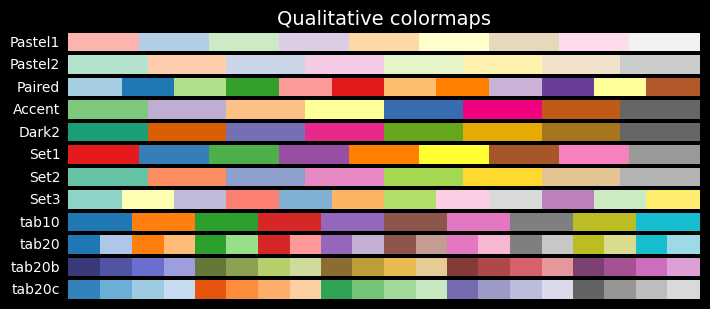

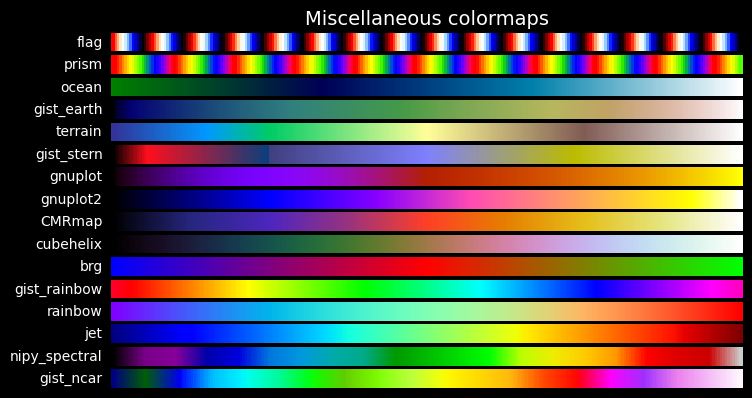

In [ ]:
plot_cmap_collections()

In [ ]:
#| export
def plot_color_bar(
    cmap:str,                        # string name of one of the cmaps 
    series:list[int|float] = None    # series of numerical values to show for each color
):
    """Plot a color bar with value overlay from `series` based on `cmap`"""
    if series is None: series = range(10)
    n_elements = len(series)
    gradient = np.linspace(0, 1, n_elements)
    gradient = np.vstack((gradient, gradient))
    _, ax = plt.subplots(figsize=(min(n_elements, 18),1))
    ax.imshow(gradient, aspect='auto', cmap=matplotlib.colormaps[cmap])
    for i, val in enumerate(series):
        ax.text(i, .7, str(val), color='#ffffff', fontsize='medium', fontweight=500, horizontalalignment='center')

    ax.set_xticks(series)
    ax.set_axis_off()
    plt.show()

In [ ]:
show_doc(plot_color_bar)

---

### plot_color_bar

>      plot_color_bar (cmap:str, series:list[int|float]=None)

Plot a color bar with value overlay from `series` based on `cmap`

|    | **Type** | **Default** | **Details** |
| -- | -------- | ----------- | ----------- |
| cmap | str |  | string name of one of the cmaps |
| series | list[int \| float] | None | series of numerical values to show for each color |

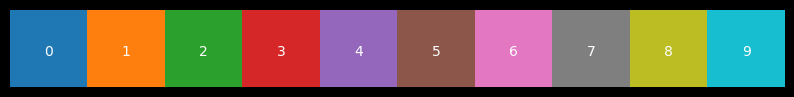

In [ ]:
plot_color_bar('tab10', range(10))

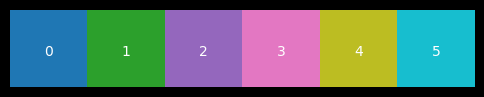

In [ ]:
plot_color_bar('tab10', series=range(6))

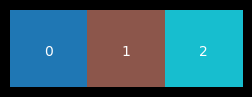

In [ ]:
plot_color_bar('tab10', series=[0, 1, 2])

In [ ]:
#| export
def get_color_mapper(
    series:list[int|float],    # series of values to map to colors  
    cmap:str = 'tab10'         # name of the cmap to use
):
    """Return color mapper based on a color map and a series of values"""
    minimum, maximum = min(series), max(series)
    norm = colors.Normalize(vmin=minimum, vmax=maximum, clip=True)
    return cm.ScalarMappable(norm=norm, cmap=matplotlib.colormaps[cmap])

In [ ]:
show_doc(get_color_mapper)

---

### get_color_mapper

>      get_color_mapper (series:list[int|float], cmap:str='tab10')

Return color mapper based on a color map and a series of values

|    | **Type** | **Default** | **Details** |
| -- | -------- | ----------- | ----------- |
| series | list[int \| float] |  | series of values to map to colors |
| cmap | str | tab10 | name of the cmap to use |

#### Usage

This function is used to ensure coherent colors for different plots.

1. Define a color mapper based on values and cmap: `clr_mapper = get_color_mapper([1, 2, 3, 4], cmap='Paired)`
2. Call the color mapper and have it return the appropriate values for any plot: `clr_mapper.to_rgba(2)`

##### Example

Let's take a dataset $(X,y)$, generated by sklearn using `make_blob` for 5,000 samples with 6 features each and grouped in 10 centers. The $X$ and $y$ are saved as `npy` file

In [ ]:
#|eval: false
import pandas as pd
with open('data-dev/ten-blobs-6-cols-X.npy', 'rb') as fp:
    X = np.load(fp)
with open('data-dev/ten-blobs-6-cols-y.npy', 'rb') as fp:
    y = np.load(fp)
    
n_feats = X.shape[1]
col_list = [f"col_{i}" for i in range(n_feats)]

X = pd.DataFrame(X, columns=col_list)
X.head(3)

,col_0,col_1,col_2,col_3,col_4,col_5
0,8.714921,0.580067,6.817529,-4.891837,-0.418419,-4.127050
1,-0.322263,-3.901781,-8.588875,1.114151,4.908420,-2.475176
2,-7.798702,-4.276232,-1.145314,-6.619232,-9.232606,6.994045


##### 1. Define a color mapper based on values and cmap

We have clustered the 5,000 sample of $X$ into 10 clusters (saved into a `clusters.npy` file)

Now we want to make a scatter plot of two of the features, displaying the 10 cluster using a `cmap`. 

To ensure that we can keep the same cluster color mapping for other plots, we use `clr_mapper` to predefine how colors are mapped to each cluster: 

- `clr_mapper = get_color_mapper(cluster_ids, cmap=cmap)`.

In [ ]:
#|eval: false
# Load clustered data from the blobs
with open('data-dev/ten-blobs-6-cols-clusters.npy', 'rb') as fp:
    clusters = np.load(fp)
    
cluster_ids = np.unique(clusters)
cluster_ids

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=int32)

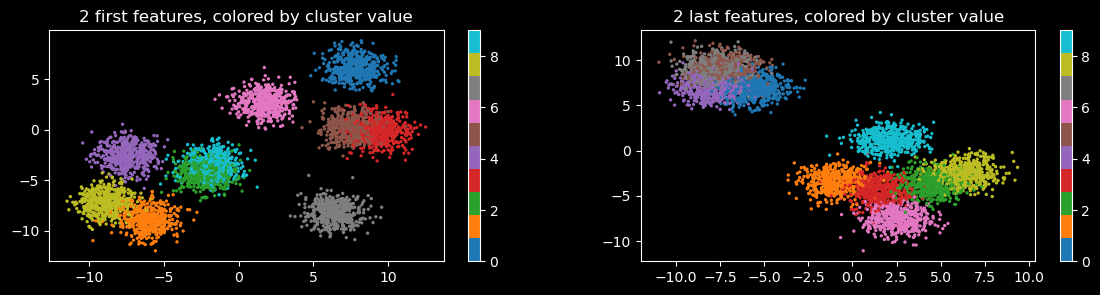

In [ ]:
#|eval: false
cmap='tab10'

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(14, 3))

im1 = ax1.scatter(X.col_0, X.col_1, c=clusters, s=2, cmap=cmap)
ax1.set_title('2 first features, colored by cluster value')
fig.colorbar(im1)

im2 = ax2.scatter(X.col_4, X.col_5, c=clusters, s=2, cmap=cmap)
ax2.set_title('2 last features, colored by cluster value')
fig.colorbar(im2)
plt.show()

In [ ]:
#|eval: false
clr_mapper = get_color_mapper(cluster_ids, cmap=cmap)

##### Call the color mapper and use it in any plot

Use for another plot, showing another feature, and its value for each sample, colored according to its cluster

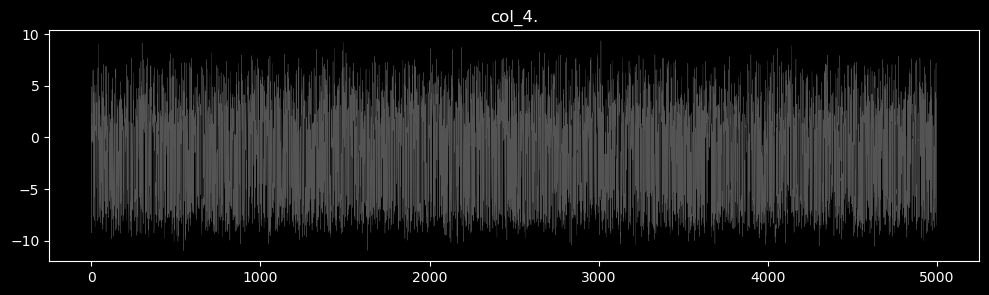

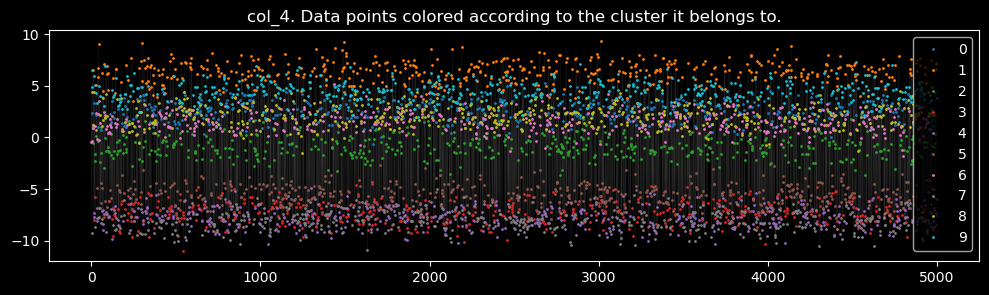

In [ ]:
#|eval: false
featname = 'col_4'
plt.figure(figsize=(12, 3))
plt.plot(X[featname], c='grey', alpha=.66, lw=0.25)
plt.title(f'{featname}.')
plt.show()

plt.figure(figsize=(12, 3))
plt.plot(X[featname], c='grey', alpha=.5, lw=0.1)
for c in cluster_ids:
    mask = y == c
    X[f"{featname}_{c}"] = X.loc[:, featname]
    X.loc[~mask, f"{featname}_{c}"] = np.nan
    plt.plot(X[f"{featname}_{c}"], label=str(c), c=clr_mapper.to_rgba(c), lw=0, marker='o', markersize=1)
plt.title(f'{featname}. Data points colored according to the cluster it belongs to.')
plt.legend()
plt.show()

# Advanced plots

In [ ]:
#| export
def plot_feature_scatter(
    X:np.ndarray,            # input dataset. `X.shape[1]` is used to set the total number of features
    y:Optional[np.ndarray] = None,  # target dataset
    n_plots:int = 2,         # number of feature pairs scatter plot to show
    axes_per_row:int = 3,    # number of axes per row. number of rows will be calculated accordingly
    axes_size:int = 5        # size of one axes. figsize will be (ncols * axes_size, nrows * axes_size)
    ):
    """Plots `n_plots` scatter plots of randomly selected combinations of two features out of X"""

    if y is None: y = np.ones(shape=(X.shape[0],))
    pairs = np.array(list(combinations(range(X.shape[1]), 2)))
    idxs = np.random.randint(pairs.shape[0], size=n_plots)
    
    ncols = axes_per_row
    nrows = n_plots // axes_per_row + (1 if n_plots % axes_per_row > 0 else 0)
    fig, axs = plt.subplots(nrows, ncols, figsize=(ncols*axes_size, nrows*axes_size))
    for (d1, d2), ax in zip(pairs[idxs, :], axs.reshape(ncols * nrows)):
        ax.scatter(X[:, d1], X[:, d2], c=y)
        ax.set_title(f"X_{min(d1, d2)} and X_{max(d1, d2)}")
        ax.set_xlabel(f"X_{d1}")
        ax.set_ylabel(f"X_{d2}")
    
    plt.show()

In [ ]:
show_doc(plot_feature_scatter)

---

### plot_feature_scatter

>      plot_feature_scatter (X:numpy.ndarray, y:Optional[numpy.ndarray]=None,
>                            n_plots:int=2, axes_per_row:int=3, axes_size:int=5)

Plots `n_plots` scatter plots of randomly selected combinations of two features out of X

|    | **Type** | **Default** | **Details** |
| -- | -------- | ----------- | ----------- |
| X | np.ndarray |  | input dataset. `X.shape[1]` is used to set the total number of features |
| y | Optional[np.ndarray] | None | target dataset |
| n_plots | int | 2 | number of feature pairs scatter plot to show |
| axes_per_row | int | 3 | number of axes per row. number of rows will be calculated accordingly |
| axes_size | int | 5 | size of one axes. figsize will be (ncols * axes_size, nrows * axes_size) |

In [ ]:
#|eval: false
X.shape

(5000, 16)

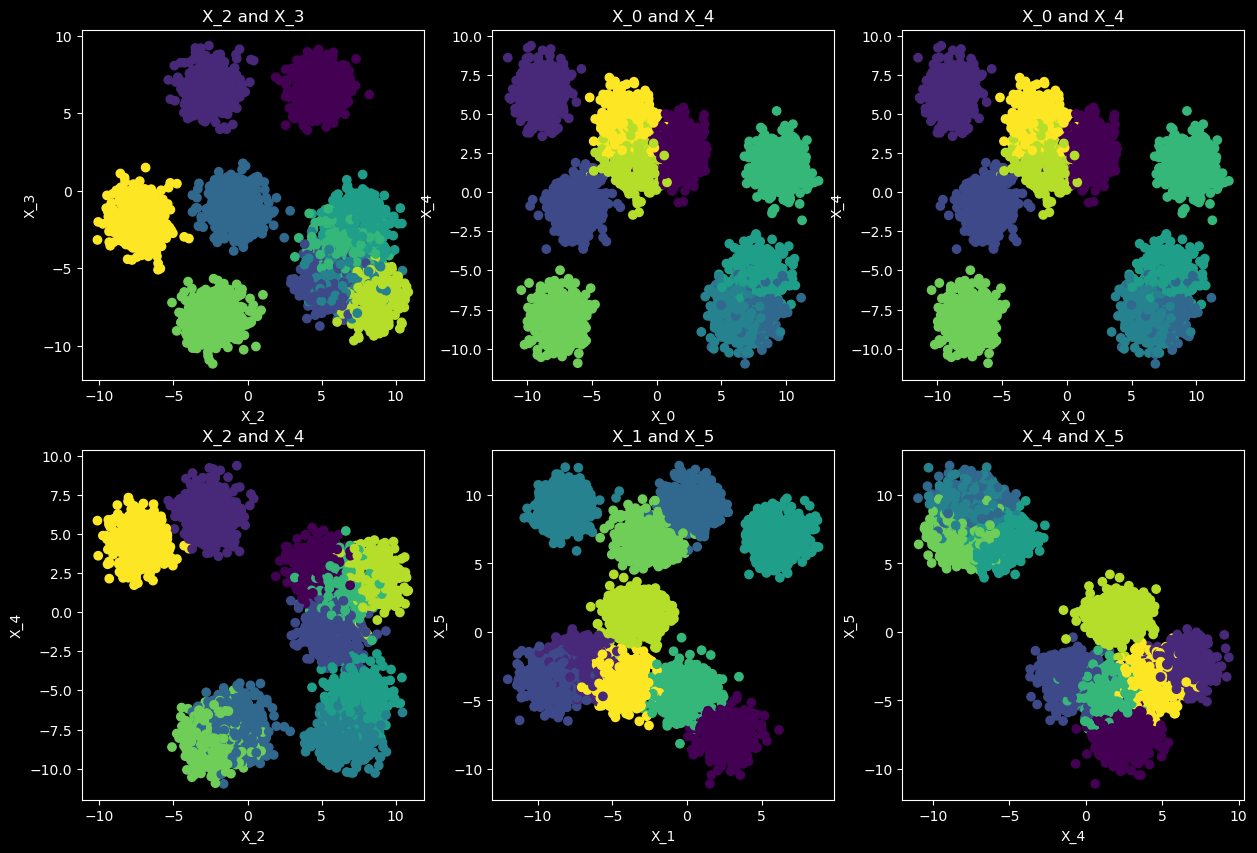

In [ ]:
#|eval: false
with open('data-dev/ten-blobs-6-cols-X.npy', 'rb') as fp:
    X = np.load(fp)
with open('data-dev/ten-blobs-6-cols-y.npy', 'rb') as fp:
    y = np.load(fp)

n_feats = X.shape[1]
col_list = [f"col_{i}" for i in range(n_feats)]
X = pd.DataFrame(X, columns=col_list)

plot_feature_scatter(X.values, y, n_plots=6, axes_per_row=3, axes_size=5)

When not value is available for `y`, it is set to 1 by default

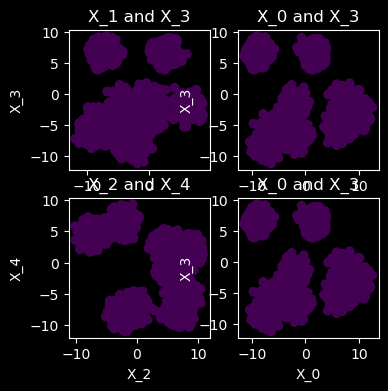

In [ ]:
#|eval: false
plot_feature_scatter(X.values, n_plots=4, axes_per_row=2, axes_size=2)

In [ ]:
#| hide
nbdev_export()